Задание
Обозначения:
p - глубина истории, сколько измерений назад учитываем в моделях
h - горизонт прогноза , на сколько измерений вперед смотрим при моделировании (как далеко предсказываем)

1. Прочитайте базу "Потребление Энергии" и сделайте модель для сезонных изменений по data_exp_1 с глубиной прогноза h=1 и h=10 по образцу из примера для обработки ряда "цена Нефти" .

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd 
import seaborn as sns

from sklearn.metrics import mean_squared_error

import os
print(os.listdir())

['.ipynb_checkpoints', 'covid_19_data.csv', 'l2_homework.ipynb', 'my_BRENT2019.csv', 'my_PJME_MW.csv', 'Анализ COVID 19.ipynb', 'Временные ряды 2.html', 'Временные ряды 2.ipynb', 'временные ряды 2.pptx', 'Стационарный ряд.rtf']


In [3]:
data = pd.read_csv('DUQ_hourly.csv', index_col=[0], parse_dates=[0])
data.head()

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0


In [5]:
data.describe()

,DUQ_MW
count,119068.000000
mean,1658.820296
std,301.740640
min,1014.000000
25%,1444.000000
50%,1630.000000
75%,1819.000000
max,3054.000000


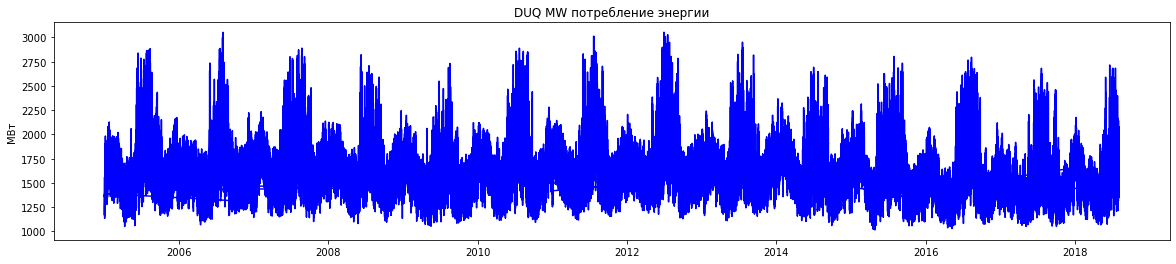

In [19]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.figure(figsize =(20,4))
plt.plot( data.index, data['DUQ_MW'], 'b' )
plt.title('DUQ MW потребление энергии' )
plt.ylabel ( 'МВт' )
plt.show()

общий вид за всё время

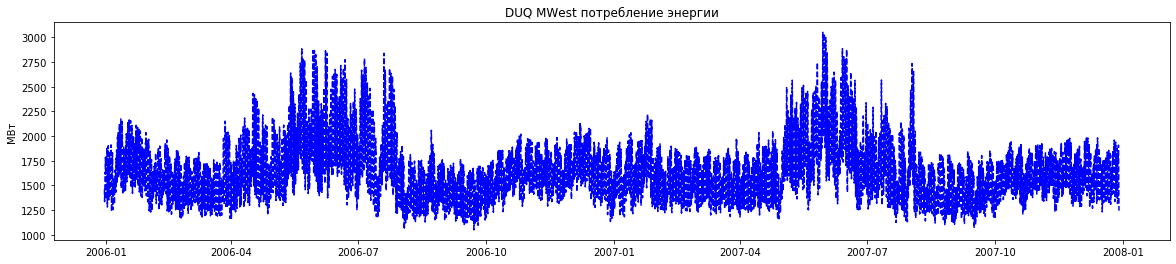

In [21]:
date_time =data['DUQ_MW']
date_time.index = pd.date_range(data.index[0], periods=data.index.shape[0], freq="H")
plt.figure(figsize =(20,4))
plt.plot( date_time.index[:24*7*104], date_time.values[:24*7*104], '--b' )

plt.title('DUQ MWest потребление энергии' )
plt.ylabel ( 'МВт' )
plt.show()

In [22]:
За 2 года: заметна сезонность

SyntaxError: invalid syntax (<ipython-input-22-b9014190670e>, line 1)

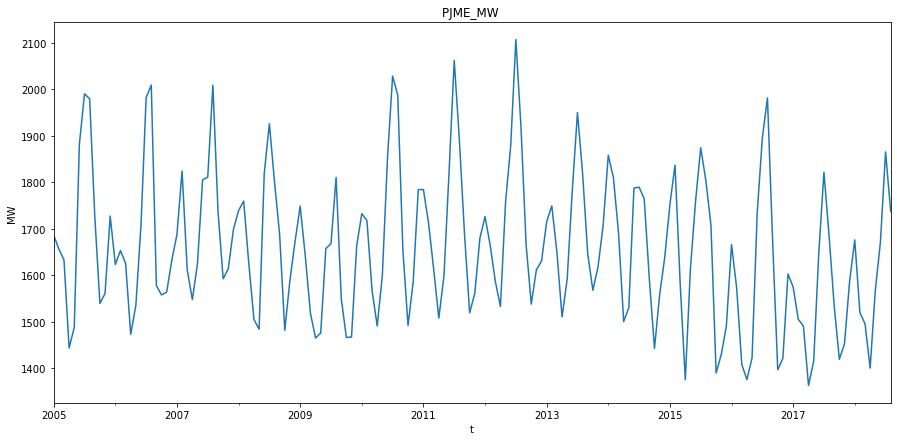

In [23]:
data_m = data.resample('M').mean()
_ = data_m['DUQ_MW'].plot( style='-', figsize=( 15, 7 ), title='PJME_MW ')
plt.ylabel('MW')
plt.xlabel('t')
plt.show()

заметна цикличность при пересчете в месячное потребление

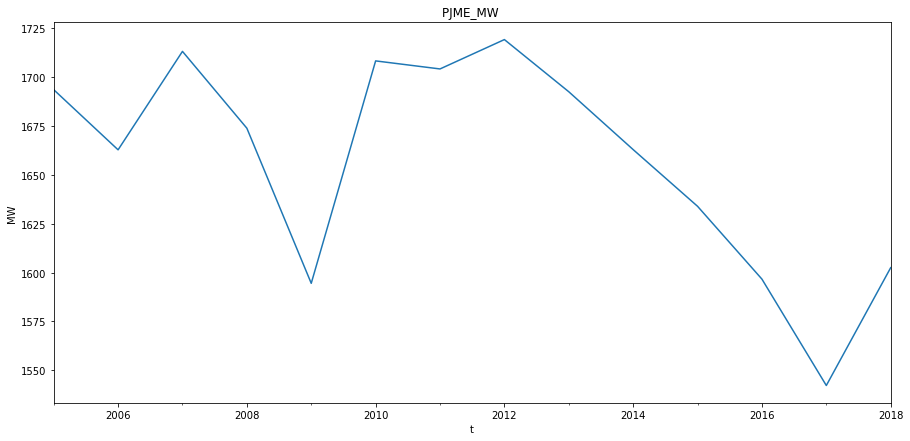

In [39]:
data_y = data.resample('Y').mean()
_ = data_y['DUQ_MW'].plot( style='-', figsize=( 15, 7 ), title='PJME_MW ')
plt.ylabel('MW')
plt.xlabel('t')
plt.show()

In [41]:
d_data = data['DUQ_MW'].values[1:]-data['DUQ_MW'].values[:-1]

In [42]:
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

In [43]:
DF_data = sm.tsa.stattools.adfuller(data_m['DUQ_MW'].values,regression='ctt')
DF_data

(-2.9660108722431473,
 0.31163367317238755,
 14,
 149,
 {'1%': -4.450617533272127,
  '5%': -3.8726239152447635,
  '10%': -3.5780787005301473},
 1714.0433104613141)

In [44]:
data.head()

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0


In [45]:
b_ar = data['DUQ_MW'].values
b_s = pd.DataFrame(data = data[['DUQ_MW']])

In [46]:
DF_data_d = sm.tsa.stattools.adfuller(d_data,regression='ctt')
DF_data_db = sm.tsa.stattools.adfuller(d_brent_data,regression='ctt')
print('коэффициент ADF для 1-й разности потребления энергии: ', DF_data_d[1])
print('коэффициент ADF для 1-й разности для цены нефти: ', DF_data_db[1])

NameError: name 'd_brent_data' is not defined

In [ ]:
Нет выраженной зависимости 

In [25]:
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

data_exp_1 = exponential_smoothing(data['Значение'], 0.08)

plt.figure(figsize=(20, 9))
plt.plot(b_s.index, b_s['Значение'], label='исходный ряд')
plt.plot(b_s['Значение'].rolling(window=N2).mean(), label="скользящие средние");

plt.plot(b_s.index,data_exp_1, color = 'red', label="экспоненциальное сглаживание");
plt.plot(b_s.index,b_s['Значение'] - b_ar_exp_1, color = 'green', label="без тренда по экспоненциальному сглаживанию");
plt.xlabel('time')
plt.ylabel('USA Dollar')
plt.legend()
plt.title('Brent 2010-2019')

KeyError: 'Значение'

In [ ]:
Оцените ошибку модели из п.2 .

Сделайте вывод о том, как изменилась ошибка модели по значениям h.

Попробуйте предположить характер ряда (стационарный или нет, с трендом, с сезоном, с циклом) для рядов из списка и аргументируйте свой ответ (одна строка):

а) Изменение температуры за окном :).

б) Количество денег, которые тратят покупатели в интернет магазине.

в) Вес растущего котенка.

г) Прирост объема деревьев в лесу от времени